# Introduction to Data Visualization

# Program so far 
***
- Python Basics
- Python Programming Constructs
- Data Structures
- Functions
- Object Oriented Programming in Python
- NumPy
- Pandas

# What are we going to learn today?
***
- Python Data Visualization Libraries
- Plot Types    
- Plot Customization

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# Python Data Visualization Libraries
***
<img src="../images/image84.jpg" alt="libs" style="width: 50%"/>

<img src="../images/logo.svg" width="20%">
***
Visualisation of complex and large data becomes easy with matplotlib
***
<img src="../images/image90.jpg" alt="libs" style="width: 700px"/>
<!-- <img src="../images/image116.jpg" alt="libs" style="width: 50%"/> -->

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# Matplotlib Basics
***
At the core of it, we need to remember only 4 things: the "canvas" to draw on, what are the X and Y axes, and that's the data along those axes.

Everything else is just details.

![](images/samplechart1.png)


<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Technical Details
***

In [1]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np

# Set it up to work with Jupyter Notebook
# (this is a Jupyter command, not Python code)
%matplotlib inline

## Sample
***

In [2]:
# Create data

def create_sample_chart():
    x_series = np.arange(10)
    y_series = x_series ** 2

    #Plotting to our canvas
    plt.plot(x_series, y_series)

    plt.title('String Title Here')
    plt.xlabel('X Axis Title Here')
    plt.ylabel('Y Axis Title Here')

    #Showing what we plotted
    plt.show();


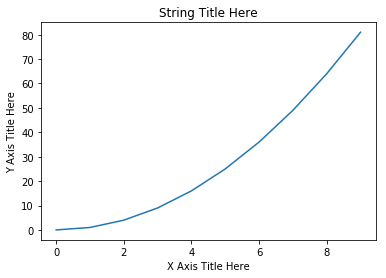

In [3]:
create_sample_chart()

##  Create your own!
***
Create a graph for `y = sin(x)`. X values should be from 0 to 10, incrementing in steps of 0.1

Remember to label the axes and the chart title appropriately.

In [4]:
def sine_wave():
    x_series = np.arange(0, 10, 0.1)
    y_series =  np.sin(x_series)

    plt.plot(x_series, y_series)
    plt.xlabel('x')
    plt.xlabel('sin(x)')
    plt.title('Sine Wave')

    plt.show();

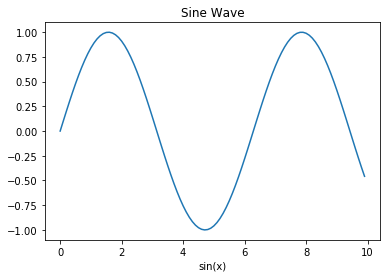

In [5]:
sine_wave()

# Let's do this with the Weather data!
***
Quick Refresher:

The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.

We analyzed this data set yesterday using the Pandas DataFrame.

### Read the data set

In [6]:
# Data Introduction
import pandas as pd
weather_df = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_df.head(5)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## How did the temperature vary amongst the months of the year?
***
Since we want to compare amongst months, we need one value for each month. Let's pick the mean for doing this.

Generate a line chart that visualizes the temperature readings in the month of January:
* x-values should be the values should be the months.
* y-values should be the mean values in the Temp (C) column per month.

Display the plot.

### Creating the data in the required format

In [7]:
monthly_data = weather_df.groupby(weather_df.index.month).mean()
monthly_data.head(3)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Date/Time,,,,,,
1,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
2,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
3,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255


In [8]:
x_series = monthly_data.index
y_series = monthly_data['Temp (C)']

### Plotting: Step 1

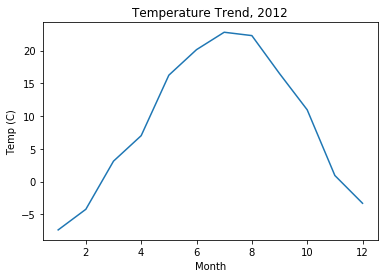

In [9]:
plt.plot(x_series, y_series)

plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.ylabel('Temp (C)')
plt.show()


### Plotting: Step 2

The chart we plotted is decent, but we aren't done yet. The X axis is labelled correctly ("Month"), but the values themselves are 2, 4, etc, instead of January, February, etc.

In [27]:
# First, get calendar month names
import calendar
calendar_months = calendar.month_name[1:]

# ALternatively just write
# calendar_months = ['January', 'February', 'March', 'April', 'May', 'June',
#                    'July', 'August', 'September', 'October', 'November', 'December']

print(calendar_months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


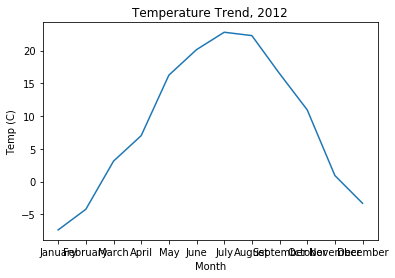

In [11]:
# now we have the names, let's use them instead
plt.plot(x_series, y_series)
plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.ylabel('Temp (C)')

# which x_series values to replace by which names
plt.xticks(x_series, calendar_months)

plt.show()

### Plotting: Step 3

Almost done, but not quite. We need the X-axis labels to be a bit more legible. Let's rotate them a bit.

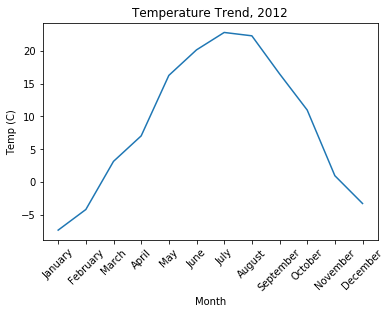

In [12]:
plt.plot(x_series, y_series)
plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.ylabel('Temp (C)')
plt.xticks(x_series, calendar_months, rotation=45)
plt.show()

# Other Plot Types
***
The chart we have so far worked with is called a Line Chart. There are other types of plots. Some important examples are:
- Bar Plots
- Histograms
- Box Plots
- Scatter Plots

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Barplot
***
A bar chart or bar graph is a chart or graph that presents grouped data with rectangular bars with lengths proportional to the values that they represent. Bar plots can be both vertical and horizontal.

The only difference in plotting a bar chart from plotting a line chart is you call **`plt.bar()`** instead of **`plt.plot()`**

![](images/sample_barplot.png)

### What was the variation in mean visibility, aggregated by day of the week?

In [13]:
import matplotlib.pyplot as plt
import calendar

def bar_plot():
    weekly_data = weather_df.groupby(weather_df.index.dayofweek).mean()
    
    plt.bar(weekly_data.index, weekly_data['Visibility (km)'])

    plt.title('Visibility by week, 2012')
    plt.xlabel('Day of week')
    plt.ylabel('Visibility (km)')

    plt.xticks(weekly_data.index, calendar.day_abbr, rotation=45)

    plt.show()

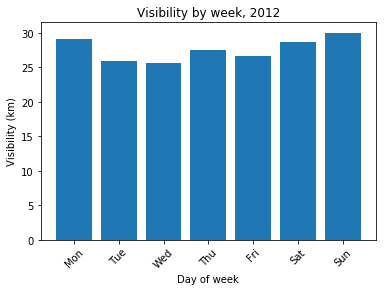

In [14]:
bar_plot()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Histogram
***
A histogram is a display of statistical information that uses bars to show the frequency of data items in successive numerical intervals of equal size. Histograms can be both vertical and horizontal.

Since a histogram is a plot of frequency(X) vs X, it only needs one series.

![](images/sample_histogram.png)

### What is the distribution of values in the Wind Speed column?

In [15]:
def hist_plot():
    plt.hist(weather_df['Wind Spd (km/h)'], bins=13)
    plt.title('Wind Speed (km/h), 2012')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Frequency')
    plt.show()

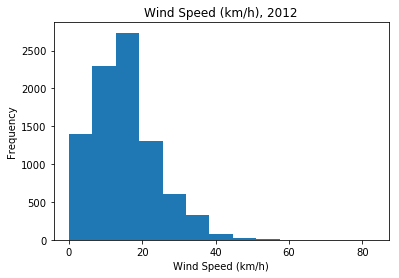

In [16]:
hist_plot()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Box Plot
***
A box plot is a another method to understand the statistical distribution of data. It provides, within one glance, several values: The mean (50 percentile) first and third quartiles (25th percentile/Q1, 75th percentile/Q3), the min and max excluding outliers, and the outliers in the data series.

In [17]:
def box_plot():
    plt.boxplot(weather_df['Wind Spd (km/h)'])
    plt.title('Wind Speed (km/h), 2012')
    plt.xlabel('Wind Speed (km/h)')
    plt.show()

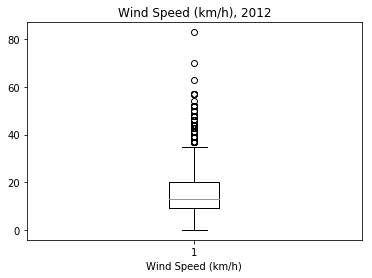

In [18]:
box_plot()

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## Scatter Plot
***
A scatter plot helps us determine if 2 columns are weakly or strongly correlated.

While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

### Example

![](../images/sample_scatterplot2.png)

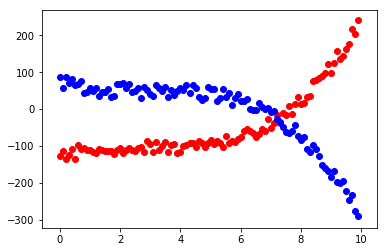

In [19]:
# Sample scatter plot

x= np.arange(0, 10, 0.1)
y1 = (((x - 3) ** 3 ) - 100) + np.random.randint(-20, 20, size=len(x))
y2 = (((3 - x) ** 3 ) + 50) + np.random.randint(-20, 20, size=len(x))

plt.scatter(x, y1, c='r')
plt.scatter(x, y2, c='b')
plt.show()

### Are the temperature and pressure correlated, according to the data in the month of January?

In [20]:
jan_df = weather_df['2012-01']

def scatter_plot():
    plt.scatter(jan_df['Stn Press (kPa)'], jan_df['Temp (C)'])

    plt.title('Pressure vs Temperature, 2012')
    plt.xlabel('Temperature (C)')
    plt.ylabel('Pressure (kPa)')
    plt.show()

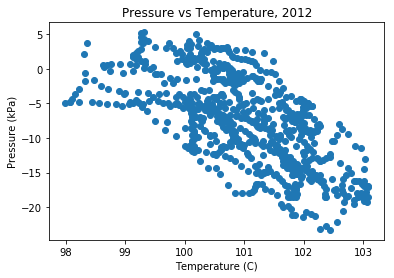

In [21]:
scatter_plot()

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# Plot Customizations
***
Matplotlib being a low level library, provides a lot of ways to customize your plots.

Some examples include:
- Configuring the line (color, width, ticks, etc)
- Configuring the axes (setting limits, layout, etc.)
- Figure and Sub Plots: Multiple plots on one canvas
- Configuring the figure size
- Adding legends, etc.

## Configuring the plotted line
***
It's easy to set colors, line types, etc. An example is below.

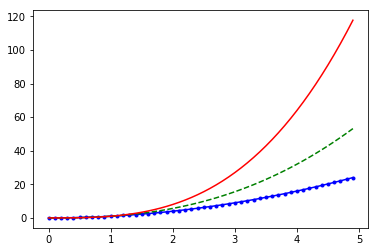

In [28]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**2.5, 'g--') # green dashed line
ax.plot(x, x**3, c='r') # red line color
fig.show()

## `.figure()`
***
This object essentially returns a new figure to work with. Axes need to be added to the figure to plot on it.

The methods on axes work the same way as **`.plot`**

In [29]:
def two_plots():
    x = np.array([0, 1, 2, 3, 4, 5])
    y = x ** 2

    # Create Figure (empty canvas)
    fig = plt.figure()

    # Add set of axes to figure
    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes 
    # (0.2x left, 0.5x bottom) to (0.4x width, 0.3x height)

    # Larger Figure Axes 1
    axes1.plot(x, y, 'b')
    axes1.set_xlabel('X_label_axes1')
    axes1.set_ylabel('Y_label_axes1')
    axes1.set_title('Axes 1 Title')

    # Insert Figure Axes 2
    axes2.plot(y, x, 'r')
    axes2.set_xlabel('X_label_axes2')
    axes2.set_ylabel('Y_label_axes2')
    axes2.set_title('Axes 2 Title');    

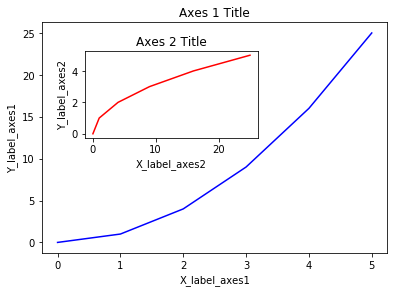

In [31]:
two_plots()

## `.subplots()`
***
The plt.subplots() object will act as a more automatic axis manager. It is similar to `plt.figure()` except use tuple unpacking to grab fig and axes.

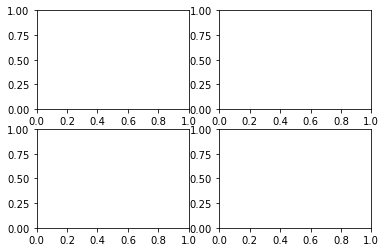

In [25]:
# Canvas of 2 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# axes is an array of shape (2, 2)

### Create a figure with four subplots, and plot `y = x ** 2` on the first and last plots
***
Make the color red in the first subplot, and a green dashed line in the last

In [32]:
def sub_plots_example():
    fig, axes = plt.subplots(nrows=2, ncols=2)

    x = np.arange(0, 5, 0.1)

    axes[0][0].plot(x, x**2, c='r')
    axes[1][1].plot(x, x**2, 'g--')

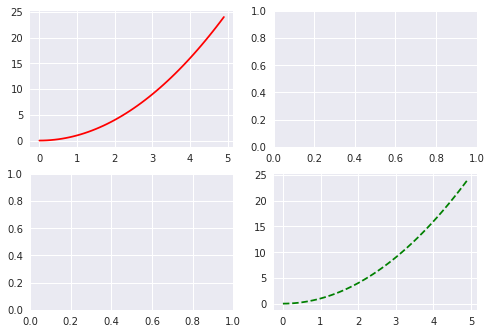

In [35]:
sub_plots_example()

## `.xlim` & `.ylim`

We can configure the ranges of the axes using the set_ylim and set_xlim methods in the axis object, 
or axis('tight') for automatically getting "tightly fitted" axes ranges.

## `.tight_layout()`

A common issue with matplotlib is overlapping subplots or figures. We can use **`fig.tight_layout()`** or **`plt.tight_layout()`** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content.

## `.figsize`
figsize is a tuple of the width and height of the figure in inches

## `.legend()`
You can use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure.

## `.savefig()`
***
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

    fig.savefig("filename.png", dpi=200)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# Seaborn
***
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Understanding matplotlib was essential for understanding how to create plots, but we'll be using Seaborn for general data analysis.

## Why? Because it's beautiful and easy!
***
Let's revisit a question we solved today: **What is the distribution of values in the Wind Speed column?**

/home/bhumil/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


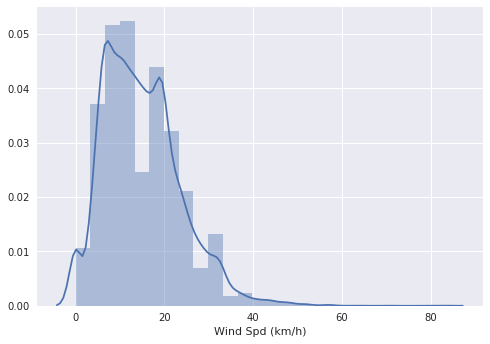

In [34]:
import seaborn as sns
sns.distplot(weather_df['Wind Spd (km/h)'], bins=25)

# Further Reading
***
- Matplotlib documentation: https://matplotlib.org/
- Seaborn documentation: https://seaborn.pydata.org/

<img src="../images/icon/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />
# In-session Recap Time
***

- Python Data Visualization Libraries
    - Matplotlib
- Plot Types    
    - Bar Plots
    - Histograms
    - Box Plots
    - Scatter Plots
- Plot Customization

# Thank You
***

### Next Session: Intro to ML
For more queries - Reach out to academics@greyatom.com 